In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(300, 1)


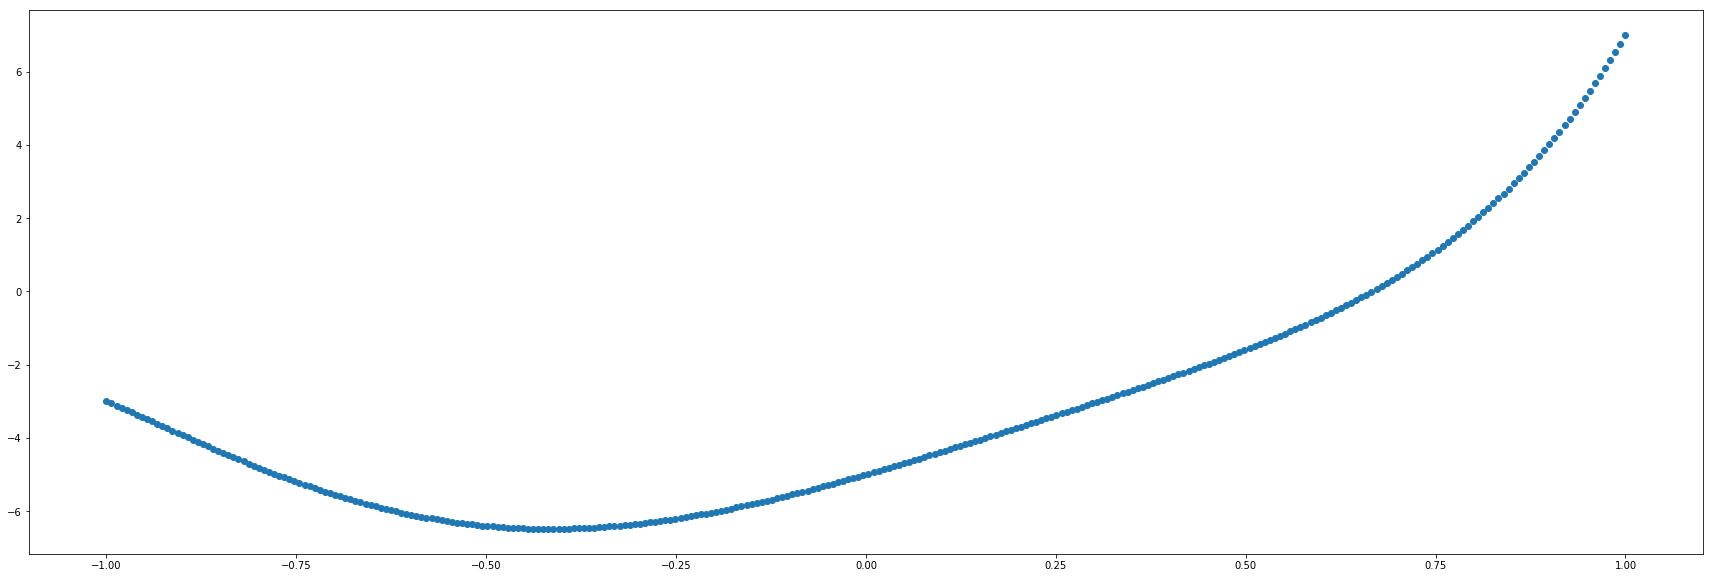

In [10]:
#使用Numpy生成随机点,训练集
trainSetCount = 300
x_data = np.linspace(-1,1,trainSetCount)[:,np.newaxis]  #-1到1之间分布300*1的向量
print(x_data.shape)
noise = np.random.uniform(-0.002,0.002,x_data.shape)
y_data =  6*x_data \
        + 3*x_data ** 2 \
        - 6*x_data ** 3 \
        + 4*x_data ** 4 \
        + 5*x_data ** 5 \
        - 5 \
        + noise #  300*1

plt.figure(figsize=(30,10))
plt.scatter(x_data,y_data)
plt.show()

In [11]:
mean = np.mean(y_data)
var = np.var(y_data)
print("mean = {},  var = {}".format(mean,var))
test = (y_data - mean )/ var
print(np.min(test),np.max(test))

mean = -3.182613066440991,  var = 10.825773626247392
-0.30534968599513185 0.9407557788956461


In [19]:
tf.reset_default_graph()
input_x = tf.placeholder(tf.float32,shape=(None,1))
input_y = tf.placeholder(tf.float32,shape=(None,1))
input_mean = tf.placeholder(tf.float32)
input_var = tf.placeholder(tf.float32)

weights1 = tf.Variable(tf.truncated_normal((1,15)))
bias1 =  tf.Variable(tf.zeros((15,)))

logits1 = tf.matmul(input_x,weights1) + bias1
predict1 = tf.nn.tanh(logits1)

weight2 = tf.Variable(tf.truncated_normal((15,1)))
bias2 =  tf.Variable(tf.zeros((1,)))

logits = tf.matmul(predict1,weight2) + bias2
normal_predict = tf.nn.tanh(logits)

predict = normal_predict * input_var + input_mean
normal_y = (input_y - input_mean) / input_var
#loss
loss_op = tf.reduce_mean(tf.square(normal_predict - normal_y))
#optimizer
optimizer = tf.train.AdamOptimizer(0.001)
#minimize
train_op = optimizer.minimize(loss_op)

# 使用feed_dict传递给placeholder ，使用fetch传递多步op


[20000/20000]  loss = 3.18971615342889e-0505

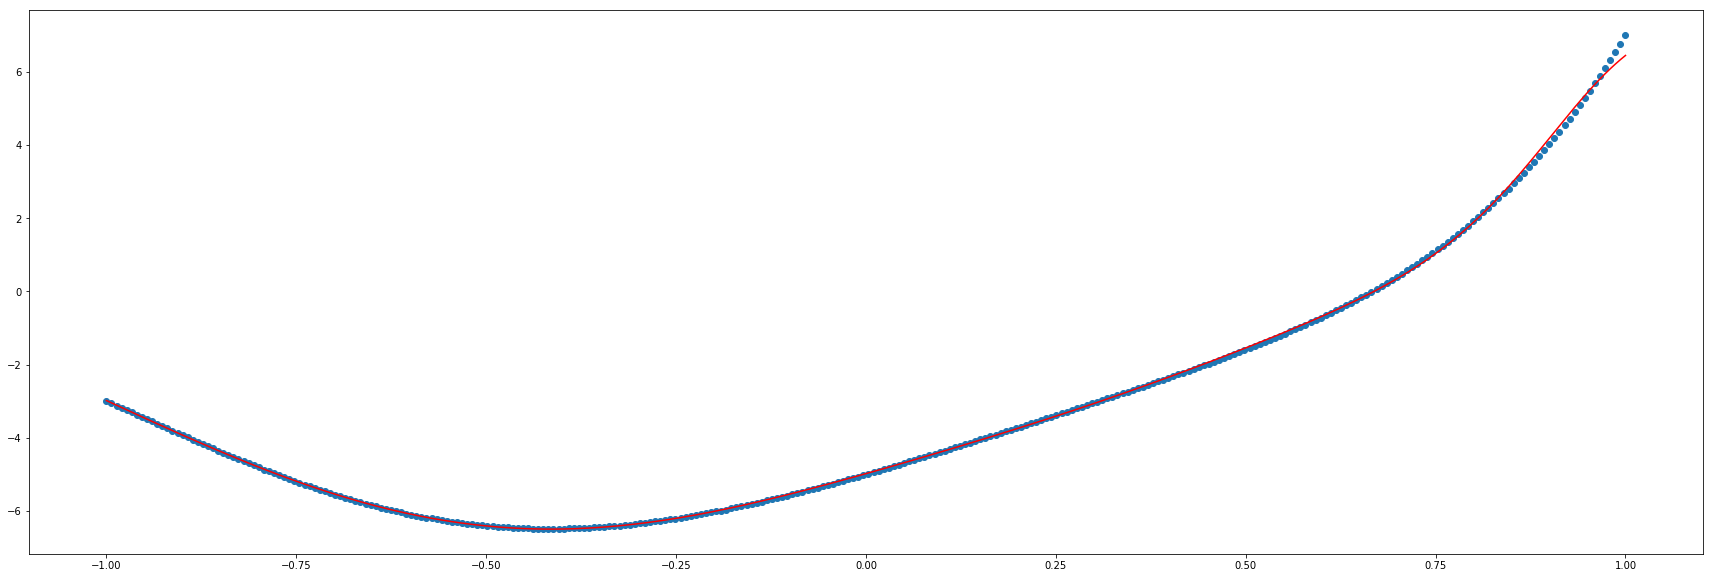

In [20]:
#train
EPOCH = 20000
range_list = range(EPOCH)
loss_list = np.zeros((EPOCH,))
global_init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(global_init_op)
    for epoch in range_list:
        _,loss = sess.run([train_op,loss_op],feed_dict={input_x:x_data,input_y:y_data,input_mean:mean,input_var:var})
        print("\r[{}/{}]  loss = {}".format(epoch+1,EPOCH,loss),end='')
        loss_list[epoch] = loss
    else:
        predict_y = sess.run(predict,feed_dict={input_x:x_data,input_mean:mean,input_var:var})
        plt.figure(figsize=(30,10))
        plt.scatter(x_data,y_data)
        plt.plot(x_data,predict_y,"r-")
        plt.show()

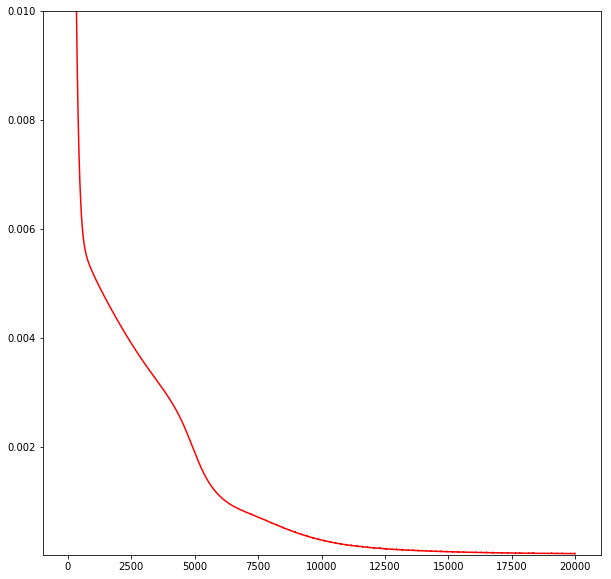

In [21]:
plt.figure(figsize=(10,10))
plt.ylim(0.00001,0.01)
plt.plot(range_list,loss_list,"r-")
plt.show()